In [45]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.molSize = (500, 300)
from rdkit.Chem import Draw
from kartograf import SmallMoleculeComponent
from kartograf.atom_aligner import align_mol_shape, align_mol_skeletons
from kartograf import KartografAtomMapper
from kartograf.atom_mapping_scorer import MappingRMSDScorer, MappingShapeOverlapScorer
from kartograf.utils.mapping_visualization_widget import display_mappings_3d

In [46]:
df = pd.read_pickle('/Users/kate_fieseler/PycharmProjects/syndirella/syndirella/tests/vectors/2_test_set_rxnmapper.pkl.gz')
reaction = df.iloc[0].to_dict()
reaction

{'base_compound_smiles': 'N#CCC(=O)Nc1cccc(NC(=O)C2CCCO2)c1',
 '1_reaction': 'Amidation',
 '1_r1_smiles': 'O=C(O)C1CCCO1',
 '1_r2_smiles': 'CC(C)(C)OC(=O)Nc1cccc(N)c1',
 '1_product_smiles': 'CC(C)(C)OC(=O)Nc1cccc(NC(=O)C2CCCO2)c1',
 '1_product_mapped_smarts': '[CH3:1][C:2]([CH3:3])([CH3:4])[O:5][C:6](=[O:7])[NH:8][c:9]1[cH:10][cH:11][cH:12][c:13]([NH:14][C:15](=[O:16])[CH:17]2[CH2:18][CH2:19][CH2:20][O:21]2)[cH:22]1',
 '1_r_previous_product': None,
 '1_prod_to_r1': {0: 0, 15: 1, 16: 2, 17: 3, 18: 4, 19: 5, 20: 6, 21: 7},
 '1_prod_to_r2': {1: 0,
  2: 1,
  3: 2,
  4: 3,
  5: 4,
  6: 5,
  7: 6,
  8: 7,
  9: 8,
  10: 9,
  11: 10,
  12: 11,
  13: 12,
  14: 13,
  22: 14},
 '2_reaction': 'N-Boc_deprotection',
 '2_r1_smiles': 'CC(C)(C)OC(=O)Nc1cccc(NC(=O)C2CCCO2)c1',
 '2_r2_smiles': '',
 '2_product_smiles': 'Nc1cccc(NC(=O)C2CCCO2)c1',
 '2_product_mapped_smarts': '[NH2:1][c:2]1[cH:3][cH:4][cH:5][c:6]([NH:7][C:8](=[O:9])[CH:10]2[CH2:11][CH2:12][CH2:13][O:14]2)[cH:15]1',
 '2_r_previous_product': 

In [47]:
to_hippo = pd.read_pickle('/Users/kate_fieseler/PycharmProjects/syndirella/syndirella/tests/vectors/BHKVBKDDVLQZCR-UHFFFAOYSA-N_3ADBvA_to_hippo.pkl.gz')
to_hippo

,base_compound_smiles,1_reaction,1_r1_smiles,1_r2_smiles,1_r_previous_product,1_product_smiles,1_product_name,1_num_atom_diff,1_flag,2_reaction,...,3_flag,3_stereoisomer,error,∆∆G,∆G_bound,∆G_unbound,comRMSD,regarded,path_to_mol,intra_geometry_pass
0,N#CCC(=O)Nc1cccc(NC(=O)C2CCCO2)c1,Amidation,O=C(O)C1CCCO1,CC(C)(C)OC(=O)Nc1cccc(N)c1,None,CC(C)(C)OC(=O)Nc1cccc(NC(=O)C2CCCO2)c1,BHKVBKDDVLQZCR-UHFFFAOYSA-N-eb2Mvx-1,None,None,N-Boc_deprotection,...,None,A,,-22.720858,383.470848,406.191706,0.553939,"[A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1, A7...",/data/xchem-fragalysis/kfieseler/A71EV2A_run4/...,True
1,N#CCC(=O)Nc1cccc(NC(=O)C2CCCO2)c1,Amidation,O=C(O)C1CCCO1,CC1(C)CN(c2cccc(N)c2)C(=O)O1,None,CC1(C)CN(c2cccc(NC(=O)C3CCCO3)c2)C(=O)O1,BHKVBKDDVLQZCR-UHFFFAOYSA-N-eb2Mvx-2,None,None,N-Boc_deprotection,...,None,A,,-22.720858,383.470848,406.191706,0.553939,"[A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1, A7...",/data/xchem-fragalysis/kfieseler/A71EV2A_run4/...,True
2,N#CCC(=O)Nc1cccc(NC(=O)C2CCCO2)c1,Amidation,O=C(O)C1CCCO1,CC(C)(C)OC(=O)Nc1cccc(N)c1,None,CC(C)(C)OC(=O)Nc1cccc(NC(=O)C2CCCO2)c1,BHKVBKDDVLQZCR-UHFFFAOYSA-N-eb2Mvx-1,None,None,N-Boc_deprotection,...,None,B,,-23.505138,385.884760,409.389898,0.632163,"[A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1, A7...",/data/xchem-fragalysis/kfieseler/A71EV2A_run4/...,True
3,N#CCC(=O)Nc1cccc(NC(=O)C2CCCO2)c1,Amidation,O=C(O)C1CCCO1,CC1(C)CN(c2cccc(N)c2)C(=O)O1,None,CC1(C)CN(c2cccc(NC(=O)C3CCCO3)c2)C(=O)O1,BHKVBKDDVLQZCR-UHFFFAOYSA-N-eb2Mvx-2,None,None,N-Boc_deprotection,...,None,B,,-23.505138,385.884760,409.389898,0.632163,"[A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1, A7...",/data/xchem-fragalysis/kfieseler/A71EV2A_run4/...,True
4,N#CCC(=O)Nc1cccc(NC(=O)C2CCCO2)c1,Amidation,O=C(O)C1CCCO1,CC(C)(C)OC(=O)Nc1ccc(O)c(N)c1,None,CC(C)(C)OC(=O)Nc1ccc(O)c(NC(=O)C2CCCO2)c1,BHKVBKDDVLQZCR-UHFFFAOYSA-N-eb2Mvx-23,None,None,N-Boc_deprotection,...,None,A,,-50.093752,387.081530,437.175283,0.554922,"[A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1, A7...",/data/xchem-fragalysis/kfieseler/A71EV2A_run4/...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13040,N#CCC(=O)Nc1cccc(NC(=O)C2CCCO2)c1,Amidation,CC1CCC(C(=O)O)O1,Cc1ccc(NC(=O)OC(C)(C)C)cc1N,None,Cc1ccc(NC(=O)OC(C)(C)C)cc1NC(=O)C1CCC(C)O1,BHKVBKDDVLQZCR-UHFFFAOYSA-N-eb2Mvx-132,None,None,N-Boc_deprotection,...,None,B,,-39.607626,534.560168,574.167795,0.841773,"[A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1, A7...",/data/xchem-fragalysis/kfieseler/A71EV2A_run4/...,True
13041,N#CCC(=O)Nc1cccc(NC(=O)C2CCCO2)c1,Amidation,CC1CCC(C(=O)O)O1,Cc1ccc(NC(=O)OC(C)(C)C)cc1N,None,Cc1ccc(NC(=O)OC(C)(C)C)cc1NC(=O)C1CCC(C)O1,BHKVBKDDVLQZCR-UHFFFAOYSA-N-eb2Mvx-132,None,None,N-Boc_deprotection,...,None,C,,-15.046741,434.889217,449.935958,0.600600,"[A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1, A7...",/data/xchem-fragalysis/kfieseler/A71EV2A_run4/...,True
13042,N#CCC(=O)Nc1cccc(NC(=O)C2CCCO2)c1,Amidation,CC1CCC(C(=O)O)O1,Cc1ccc(NC(=O)OC(C)(C)C)cc1N,None,Cc1ccc(NC(=O)OC(C)(C)C)cc1NC(=O)C1CCC(C)O1,BHKVBKDDVLQZCR-UHFFFAOYSA-N-eb2Mvx-132,None,None,N-Boc_deprotection,...,None,D,,-7.433983,489.373608,496.807591,0.706762,"[A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1, A7...",/data/xchem-fragalysis/kfieseler/A71EV2A_run4/...,True
13043,N#CCC(=O)Nc1cccc(NC(=O)C2CCCO2)c1,Amidation,CC1CCC(C(=O)O)O1,Cc1ccc(NC(=O)OC(C)(C)C)cc1N,None,Cc1ccc(NC(=O)OC(C)(C)C)cc1NC(=O)C1CCC(C)O1,BHKVBKDDVLQZCR-UHFFFAOYSA-N-eb2Mvx-132,None,None,N-Boc_deprotection,...,None,A,,-59.881219,480.041054,539.922272,0.655331,"[A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1, A7...",/data/xchem-fragalysis/kfieseler/A71EV2A_run4/...,True


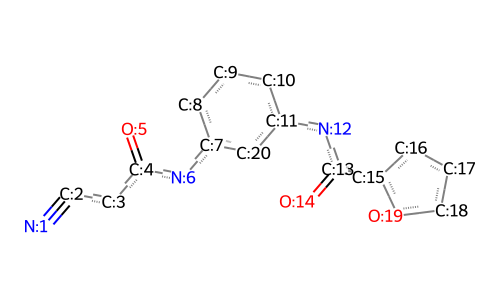

In [48]:
# show base compound
Chem.MolFromSmarts(reaction['3_product_mapped_smarts'])

In [49]:
r1_elabs = to_hippo['3_r1_smiles'].unique()
r2_elabs = to_hippo['3_r2_smiles'].unique()
print(len(r1_elabs), len(r2_elabs))

40 100


[15:58:58] UFFTYPER: Unrecognized atom type: O_5 (0)
[15:58:58] UFFTYPER: Unrecognized atom type: C_5 (1)
[15:58:58] UFFTYPER: Unrecognized atom type: C_6 (2)


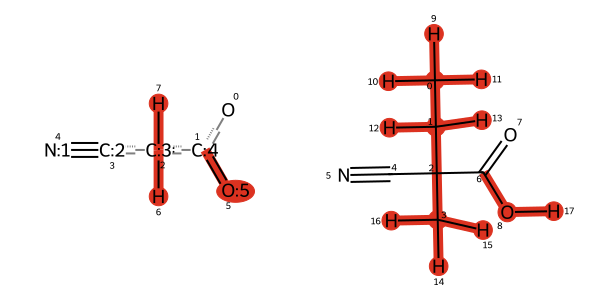

In [60]:
random_seed = 30
# run kartograf with SMARTS mol
orig_mol_noh = Chem.MolFromSmarts(reaction['3_r1_smarts'])
Chem.SanitizeMol(orig_mol_noh)
orig_mol = Chem.AddHs(orig_mol_noh, addCoords=True)
elab_mol = Chem.AddHs(Chem.MolFromSmiles(r1_elabs[10]), addCoords=True) #26 good
# make mapping of first superstructure to original reactant
Chem.rdDistGeom.EmbedMolecule(orig_mol, useRandomCoords=False, randomSeed=random_seed)
orig_smc = SmallMoleculeComponent.from_rdkit(orig_mol)
Chem.rdDistGeom.EmbedMolecule(elab_mol, useRandomCoords=False, randomSeed=random_seed)
elab_smc = SmallMoleculeComponent.from_rdkit(elab_mol)
# Align product to base compound
elab_alignOrig = align_mol_shape(elab_smc, ref_mol=orig_smc)
# Get  mapping
mapper = KartografAtomMapper(atom_map_hydrogens=True, atom_max_distance=0.95)
kartograf_mapping = next(mapper.suggest_mappings(orig_smc, elab_alignOrig))
kartograf_mapping

In [61]:
display_mappings_3d(kartograf_mapping)

In [62]:
# Score mapping
rmsd_scorer = MappingRMSDScorer()
score = rmsd_scorer(mapping=kartograf_mapping)
score
# Score mapping with shape overlay
shape_scorer = MappingShapeOverlapScorer()
shape_score = shape_scorer(mapping=kartograf_mapping)
shape_score
print(f'RMSD: {score}, Shape: {shape_score}')

RMSD: 0.6234243699352222, Shape: 0.44434839666447296
